## Introduction to Linear Regression


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [16]:
x = np.array([10, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([10, 14, 20, 32, 37, 50])

In [17]:
model = LinearRegression()

In [18]:
model.fit(x, y)

LinearRegression()

In [19]:
model = LinearRegression().fit(x, y)

In [20]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.985707008624335


In [21]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: 0.421917808219181
slope: [0.86739726]


In [22]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 9.09589041 13.43287671 22.10684932 30.78082192 39.45479452 48.12876712]


In [23]:
y

array([10, 14, 20, 32, 37, 50])

### Simple Linear Regression

In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('Weather.csv')
dataset = data.copy()

In [6]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.tail(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
23713,11606,1944-11-22,4.826,NaN,28.888889,24.444444,26.666667,0.0,1,44,11,22,0.19,NaN,NaN,84.0,76.0,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,11606,1944-11-23,10.414,NaN,27.222222,23.333333,25.555556,0.0,1,44,11,23,0.41,NaN,NaN,81.0,74.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,11606,1944-11-24,4.572,NaN,29.444444,24.444444,26.666667,0.0,1,44,11,24,0.18,NaN,NaN,85.0,76.0,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,11606,1944-11-25,0,NaN,30.000000,26.666667,28.333333,0.0,NaN,44,11,25,0,NaN,NaN,86.0,80.0,83.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23717,11606,1944-11-26,1.016,NaN,30.000000,23.888889,26.666667,0.0,1,44,11,26,0.04,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.shape

(23718, 31)

In [ ]:
# pip install missingno

In [9]:
import missingno as msno

<AxesSubplot:>

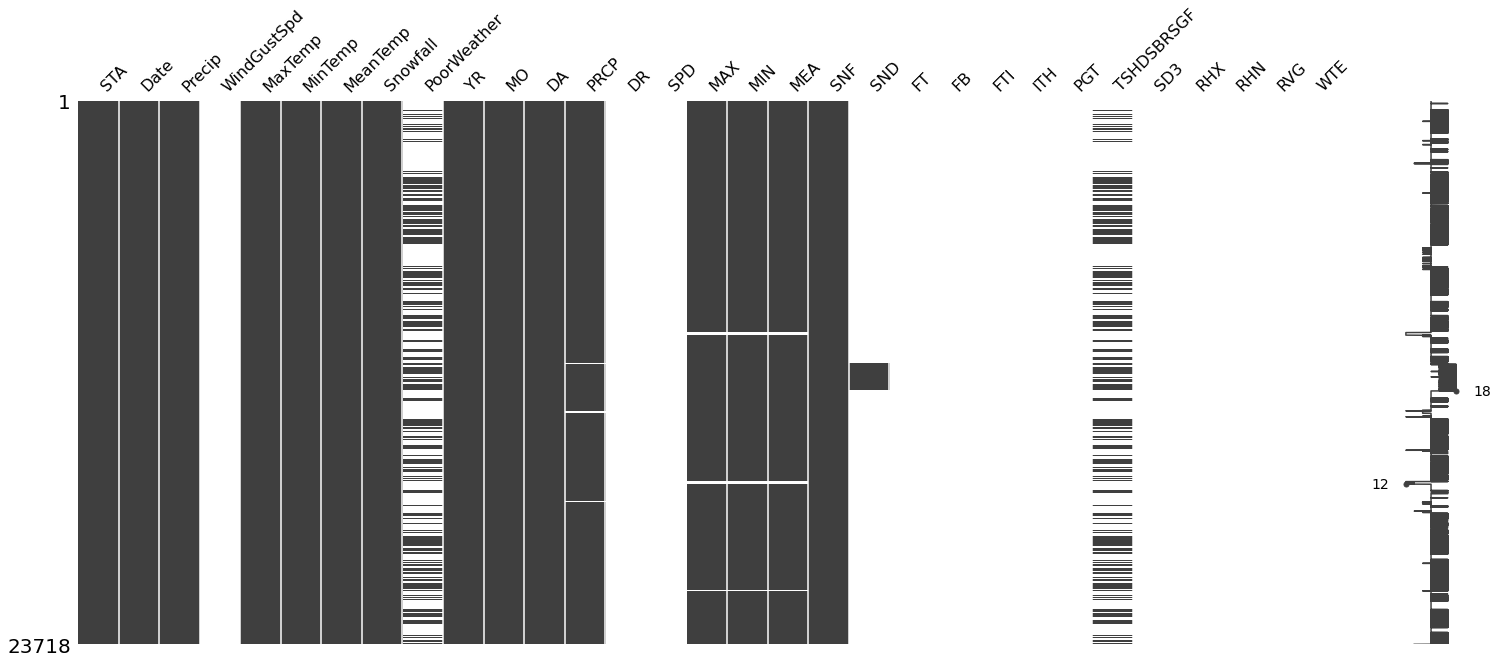

In [10]:
msno.matrix(dataset)

<AxesSubplot:>

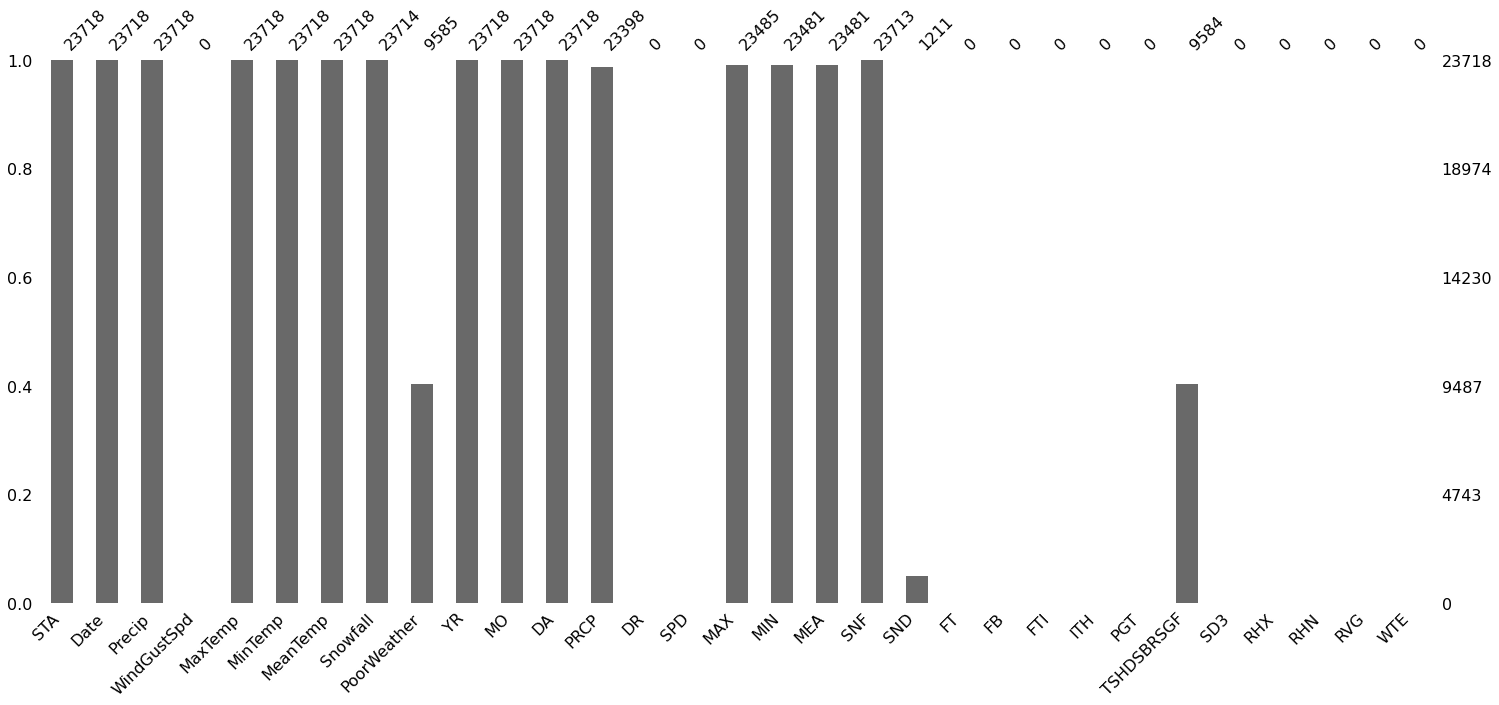

In [11]:
msno.bar(dataset)

In [12]:
dataset.isnull().sum()

STA                0
Date               0
Precip             0
WindGustSpd    23718
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall           4
PoorWeather    14133
YR                 0
MO                 0
DA                 0
PRCP             320
DR             23718
SPD            23718
MAX              233
MIN              237
MEA              237
SNF                5
SND            22507
FT             23718
FB             23718
FTI            23718
ITH            23718
PGT            23718
TSHDSBRSGF     14134
SD3            23718
RHX            23718
RHN            23718
RVG            23718
WTE            23718
dtype: int64

In [13]:
dataset.iloc[:,-12:]

,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23713,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dataset.drop(labels=dataset.iloc[:,-12:].columns,inplace=True,axis=1)

In [15]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SNF
count,23718.000000,0.0,23718.000000,23718.000000,23718.000000,23714.0,23718.000000,23718.000000,23718.000000,0.0,0.0,23485.000000,23481.000000,23481.000000,23713.0
mean,10790.522852,NaN,29.716320,22.154739,25.935155,0.0,43.598912,6.789864,15.799604,NaN,NaN,86.337535,72.600826,79.474043,0.0
std,484.715692,NaN,5.273870,4.544255,4.755754,0.0,1.222056,3.457112,8.795097,NaN,NaN,4.216562,3.889824,3.341701,0.0
min,10001.000000,NaN,-17.777778,-17.777778,-17.777778,0.0,40.000000,1.000000,1.000000,NaN,NaN,63.000000,51.000000,60.000000,0.0
25%,10505.000000,NaN,28.888889,21.666667,25.555556,0.0,43.000000,4.000000,8.000000,NaN,NaN,84.000000,71.000000,78.000000,0.0
50%,10718.000000,NaN,30.555556,22.777778,26.666667,0.0,44.000000,7.000000,16.000000,NaN,NaN,87.000000,73.000000,80.000000,0.0
75%,10807.000000,NaN,31.666667,23.888889,27.777778,0.0,45.000000,10.000000,23.000000,NaN,NaN,89.000000,75.000000,82.000000,0.0
max,11606.000000,NaN,38.888889,28.888889,31.666667,0.0,45.000000,12.000000,31.000000,NaN,NaN,102.000000,84.000000,89.000000,0.0


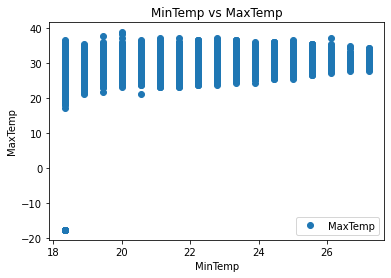

In [19]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [17]:
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

In [29]:
list_1 = ["MinTemp","MaxTemp"]

In [30]:
for cols in list_1:
    upper_bound,lower_bound = outlier_detection(dataset[cols])
    dataset[cols] = np.clip(dataset[cols],a_min=lower_bound,a_max=upper_bound)

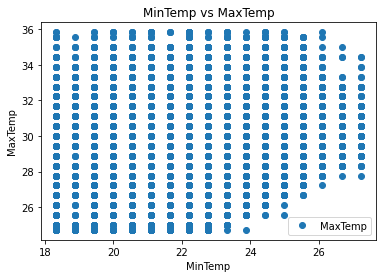

In [31]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

C:\Users\emila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

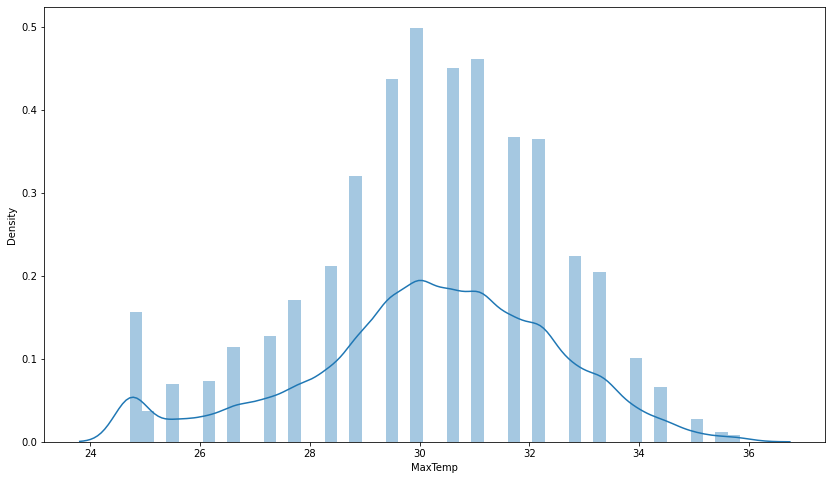

In [32]:
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [33]:
dataset['MinTemp'].values.mean

<function ndarray.mean>

In [34]:
dataset['MinTemp'].values.reshape(-1,1)

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [24.44444444],
       [26.66666667],
       [23.88888889]])

### Train and Test Splitting
#### The test_size variable is where we actually specify the proportion of the test set.


In [35]:
from sklearn.model_selection import train_test_split

In [40]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [41]:
X

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [24.44444444],
       [26.66666667],
       [23.88888889]])

In [23]:
dataset.shape

(23718, 19)

In [42]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=1,
                                                     shuffle=True
                                                    )

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18974, 1)
(4744, 1)
(18974, 1)
(4744, 1)


### Fitting
#### Time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.



In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regressor = LinearRegression()  

In [46]:
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

### Intercept and Coefficient
#### Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. 

#### To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code:


In [47]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[22.24759184]
[[0.35041385]]


### Prediction
#### This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

In [48]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [49]:
y_pred

array([[30.42391491],
       [29.83989184],
       [31.20261235],
       ...,
       [31.59196106],
       [30.22924055],
       [31.00793799]])

In [50]:
y_test

array([[31.11111111],
       [25.55555556],
       [30.55555556],
       ...,
       [31.11111111],
       [28.33333333],
       [30.55555556]])

### Evaluation of Model
#### This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, these evaluation metrics are commonly used

In [51]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [52]:
y.mean()

30.168414050211652

In [53]:
print("MAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))

MAE: 1.76
RMSE: 2.18
R**2: 0.08


In [54]:
print("MAE:",round(mean_absolute_error(y_test,y_pred),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print("R**2:",round(r2_score(y_test,y_pred),2))

MAE: 1.8
RMSE: 2.21
R**2: 0.09


In [55]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,31.111111,30.423915
1,25.555556,29.839892
2,30.555556,31.202612
3,30.000000,29.645217
4,32.222222,30.034566
...,...,...
4739,28.333333,31.202612
4740,29.444444,29.645217
4741,31.111111,31.591961
4742,28.333333,30.229241


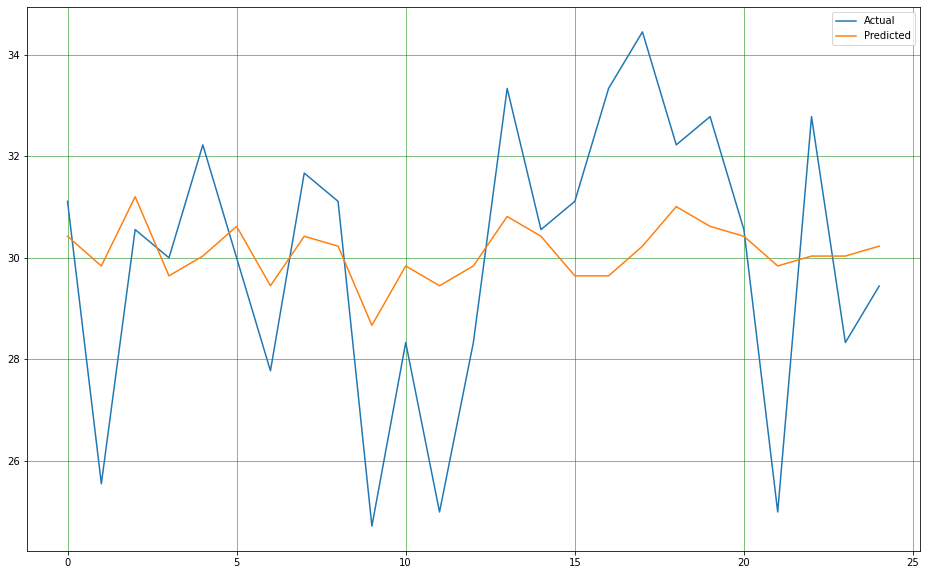

In [57]:
df1 = df.head(25)
df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

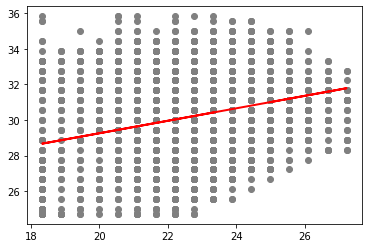

In [58]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [59]:
dataset = pd.read_csv('winequality.csv')

In [60]:
dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [61]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [62]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [62]:
X = dataset.drop("alcohol",axis=1)
y = dataset["alcohol"]

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()
X_columns = X.columns
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled,columns=X_columns)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [108]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [109]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,5.632935
volatile acidity,0.757352
citric acid,0.757244
residual sugar,3.902417
chlorides,-0.534935
free sulfur dioxide,-0.281836
total sulfur dioxide,-0.273072
density,-7.865034
pH,4.703989
sulphates,1.562447


In [110]:
y_pred = np.round(regressor.predict(X_test),1)
y_pred_train = np.round(regressor.predict(X_train),1)

In [111]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [112]:
df1 = df1.sort_values(by="Actual")

In [113]:
df1.head()

,Actual,Predicted
669,9.2,9.4
60,9.2,10.2
181,9.3,9.8
790,9.7,10.0
194,9.7,9.9


In [114]:
import seaborn as sns

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

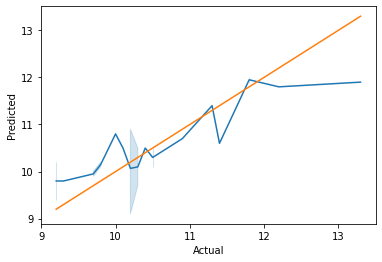

In [115]:
sns.lineplot(data=df1, x="Actual", y="Predicted")
sns.lineplot(data=df1, x="Actual", y="Actual")

In [116]:
from sklearn.metrics import mean_absolute_percentage_error

In [117]:
print("MAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("MAPE:",round(mean_absolute_percentage_error(y_train,y_pred_train)*100,2),"%")
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))

MAE: 0.46
MAPE: 4.35 %
RMSE: 0.6
R**2: 0.7


In [118]:
print("MAE:",round(mean_absolute_error(y_test,y_pred),2))
print("MAPE:",round(mean_absolute_percentage_error(y_test,y_pred)*100,2),"%")
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print("R**2:",round(r2_score(y_test,y_pred),2))

MAE: 0.44
MAPE: 4.22 %
RMSE: 0.57
R**2: 0.67


## Multiple Linear Regression



In [112]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn

print ('Predicted Stock Index Price: \n', regr.predict(X_test))


Intercept: 
 1431.7903008531664
Coefficients: 
 [ 370.54204888 -194.83930977]
Predicted Stock Index Price: 
 [1023.32247097 1062.29033293  872.23516582  950.17088973  930.68695875]
